# <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">مقدمه‌ای بر شبکه‌های عصبی و چارچوب Keras (کراس)</div>

## <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">لود کتابخانه‌های مورد استفاده</div>
<div style="direction:rtl;text-align:right;font-family:Tahoma">

برای اجرای این نوت‌بوک نیاز به نصب کتابخانه کراس (Keras) دارید. برای نصب این کتابخانه میتوانید لینک زیر را مطالعه کنید.
</div>

[http://blog.class.vision/1396/12/installing-keras-with-tensorflow-backend/](http://blog.class.vision/1396/12/installing-keras-with-tensorflow-backend/)

<div style="direction:rtl;text-align:right;font-family:Tahoma">
در صورتی که تمام کتابخانه‌های مورد نیاز شما نصب باشد سلول زیر باید بدون مشکل اجرا شود.

</div>

In [14]:
import keras
from keras.models import Sequential 
from keras.layers import Dense, Dropout, Activation
import numpy as np
import cv2

from dataset import load_hoda
from keras.utils import np_utils


<div style="direction:rtl;text-align:right;font-family:Tahoma">
برای اینکه موقع اجرای کدها دقیقا نتایج سر کلاس را بتوانید مشاهده کنید
:
</div>

In [7]:
np.random.seed(123)  # for reproducibility

## <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">لود مجموعه داده (dataset)</div>

In [8]:
x_train_original, y_train_original, x_test_original, y_test_original = load_hoda()


## <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma"> پیش‌پردازش داده‌ها برای Keras</div>
<div style="direction:rtl;text-align:right;font-family:Tahoma">
تبدیل
x_train و x_test
به فرمت آرایه‌های نامپای یا ndarray و تبدیل 
y_train و y_test
به 
one-hot-encoding
:
</div>


<div style="direction:rtl;text-align:right;font-family:Tahoma">
ابتدا تابعی ساده تعریف کردهایم که ابعاد، نوع داده ای و اطلاعات دیتاست لود شده را چاپ کند.
<br>
این اطلاعات را قبل و بعد از پیش‌پردازش داده ها چاپ خواهیم کرد تا متوجه تغییرات بشویم!
</div>

In [9]:
def print_data_info(x_train, y_train, x_test, y_test):
    #Check data Type
    print ("\ttype(x_train): {}".format(type(x_train)))
    print ("\ttype(y_train): {}".format(type(y_train)))

    #check data Shape
    print ("\tx_train.shape: {}".format(np.shape(x_train)))
    print ("\ty_train.shape: {}".format(np.shape(y_train)))
    print ("\tx_test.shape: {}".format(np.shape(x_test)))
    print ("\ty_test.shape: {}".format(np.shape(y_test)))

    #sample data
    print ("\ty_train[0]: {}".format(y_train[0]))

In [15]:
# Preprocess input data for Keras. 
x_train = np.array(x_train_original)
y_train = keras.utils.np_utils.to_categorical(y_train_original, num_classes=10)
print(y_train)
x_test  = np.array(x_test_original)
y_test  = keras.utils.np_utils.to_categorical(y_test_original, num_classes=10)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]]


In [16]:
print("Before Preprocessing:")
print_data_info(x_train_original, y_train_original, x_test_original, y_test_original)
print("After Preprocessing:")
print_data_info(x_train, y_train, x_test, y_test)

Before Preprocessing:
	type(x_train): <class 'list'>
	type(y_train): <class 'numpy.ndarray'>
	x_train.shape: (1000, 25)
	y_train.shape: (1000,)
	x_test.shape: (200, 25)
	y_test.shape: (200,)
	y_train[0]: 6
After Preprocessing:
	type(x_train): <class 'numpy.ndarray'>
	type(y_train): <class 'numpy.ndarray'>
	x_train.shape: (1000, 25)
	y_train.shape: (1000, 10)
	x_test.shape: (200, 25)
	y_test.shape: (200, 10)
	y_train[0]: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


<div style="direction:rtl;text-align:right;font-family:Tahoma">
آخرین گام پیش‌پردازش تبدیل داده‌ها به 
**float32**
و نرمال سازی مقادیر به مقدار بین 0 و 1 است.
</div>

In [17]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

## <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">تعریف معماری مدل (model architecture)</div>

In [18]:
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=25))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                1664      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
Total params: 2,314
Trainable params: 2,314
Non-trainable params: 0
_________________________________________________________________


2022-12-15 13:37:21.240429: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2022-12-15 13:37:21.322424: E tensorflow/stream_executor/cuda/cuda_driver.cc:328] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-12-15 13:37:21.322491: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (amirhossein): /proc/driver/nvidia/version does not exist
2022-12-15 13:37:21.323131: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">Compile model</div>


In [19]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

## <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">آموش مدل با داده‌های آموزشی</div>


In [21]:
model.fit(x_train, y_train,
          epochs=30,
          batch_size=64, validation_split=0.2)

Epoch 1/30
13/13 [==============================] - 0s 12ms/step - loss: 0.3195 - accuracy: 0.9062 - val_loss: 0.4129 - val_accuracy: 0.8800
Epoch 2/30
13/13 [==============================] - 0s 5ms/step - loss: 0.3127 - accuracy: 0.9075 - val_loss: 0.4063 - val_accuracy: 0.8850
Epoch 3/30
13/13 [==============================] - 0s 6ms/step - loss: 0.3057 - accuracy: 0.9087 - val_loss: 0.4013 - val_accuracy: 0.8900
Epoch 4/30
13/13 [==============================] - 0s 5ms/step - loss: 0.2992 - accuracy: 0.9050 - val_loss: 0.3992 - val_accuracy: 0.8850
Epoch 5/30
13/13 [==============================] - 0s 5ms/step - loss: 0.2929 - accuracy: 0.9075 - val_loss: 0.3905 - val_accuracy: 0.8850
Epoch 6/30
13/13 [==============================] - 0s 3ms/step - loss: 0.2882 - accuracy: 0.9050 - val_loss: 0.3871 - val_accuracy: 0.8900
Epoch 7/30
13/13 [==============================] - 0s 5ms/step - loss: 0.2821 - accuracy: 0.9100 - val_loss: 0.3833 - val_accuracy: 0.8900
Epoch 8/30
13/13 [=

## <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">ارزیابی مدل روی داده های آزمون</div>

In [22]:
loss, acc = model.evaluate(x_test, y_test)
print('\nTesting loss: %.2f, acc: %.2f%%'%(loss, acc))

7/7 [==============================] - 0s 1ms/step - loss: 0.2637 - accuracy: 0.9250

Testing loss: 0.26, acc: 0.93%


## <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">پیش‌بینی داده‌های آموزشی</div>


predicted:
[7 2 3 5 5 5 4 7 3 2 0 8 8 0 2 9 3 6 7 4 0 3 6 3 9 2 7 5 2 9 2 5 5 8 9 6 5
 1 4 8 8 4 7 2 1 2 7 9 0 3 7 5 7 5 2 9 8 2 9 8 8 6 6 6 7 6 2 4 6 4 4 5 9 1
 8 4 0 5 6 2 4 6 2 7 7 7 7 1 8 1 7 8 7 7 8 9 7 2 3 1 0 2 9 6 3 5 5 0 0 9 6
 7 9 3 9 9 8 7 9 2 5 2 5 5 9 6 9 2 0 3 7 9 5 2 9 0 4 1 8 2 2 3 5 2 9 3 8 2
 7 0 9 9 5 7 6 5 4 4 9 3 7 0 7 4 9 4 7 3 4 1 5 6 7 9 1 3 5 3 5 7 4 1 3 3 1
 1 3 3 8 9 6 7 7 2 3 0 1 4 9 5]
True Label:
[7 2 3 1 5 5 4 7 3 2 0 8 8 0 2 9 3 6 7 4 0 3 6 3 9 2 7 5 2 9 7 5 5 8 9 6 5
 1 4 8 8 4 7 7 1 2 7 9 0 3 7 4 7 5 2 9 8 2 9 8 8 6 6 6 6 6 2 4 3 4 4 5 9 1
 8 2 0 5 6 2 4 3 2 7 7 7 7 1 8 1 7 8 7 7 8 9 3 2 3 1 0 2 9 6 3 5 5 0 0 3 6
 7 9 3 9 9 8 7 9 2 5 2 5 5 9 6 9 2 0 3 7 6 5 2 9 0 4 1 8 2 2 3 0 2 9 3 8 6
 7 0 9 9 0 7 6 5 4 7 9 3 7 0 7 1 9 4 7 3 4 1 5 6 7 9 1 3 5 4 5 7 4 1 3 3 1
 2 3 3 8 9 6 7 7 2 3 0 1 4 9 5]


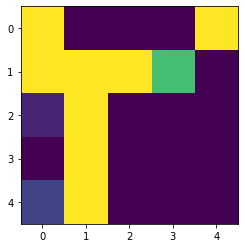

In [31]:
# The predict_classes function outputs the highest probability class
# according to the trained classifier for each input example.
predicted_classes = model.predict_classes(x_test)
print("predicted:")
print(predicted_classes)
print("True Label:")
print(y_test_original)
import matplotlib.pyplot as plt
plt.imshow(x_train_original[3].reshape(5,5))

## <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">کد کامل، از ابتدا تا انتها</div>



In [13]:
# 1. Import libraries and modules
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
import numpy as np
from dataset import load_hoda

np.random.seed(123)  # for reproducibility

# 2. Load pre-shuffled HODA data into train and test sets
x_train_original, y_train_original, x_test_original, y_test_original = load_hoda()

# 3. Preprocess input data
''' 3.1: input data in numpy array format'''
x_train = np.array(x_train_original)
x_test = np.array(x_test_original)
'''3.2 normalize our data values to the range [0, 1]'''
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# 4. Preprocess class labels
y_train = keras.utils.to_categorical(y_train_original, num_classes=10)
y_test = keras.utils.to_categorical(y_test_original, num_classes=10)

# 5. Define model architecture
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=25))
model.add(Dense(10, activation='softmax'))

# 6. Compile model
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# 7. Fit model on training data
model.fit(x_train, y_train,
          epochs=30,
          batch_size=64)

# 8. Evaluate model on test data
loss, acc = model.evaluate(x_test, y_test)
print('\nTesting loss: %.2f, acc: %.2f%%'%(loss, acc))

Epoch 1/30
1000/1000 [==============================] - 0s 148us/step - loss: 2.0820 - acc: 0.2990
Epoch 2/30
1000/1000 [==============================] - 0s 28us/step - loss: 1.8258 - acc: 0.5030
Epoch 3/30
1000/1000 [==============================] - 0s 31us/step - loss: 1.6154 - acc: 0.6720
Epoch 4/30
1000/1000 [==============================] - 0s 28us/step - loss: 1.4207 - acc: 0.7540
Epoch 5/30
1000/1000 [==============================] - 0s 31us/step - loss: 1.2467 - acc: 0.7940
Epoch 6/30
1000/1000 [==============================] - 0s 42us/step - loss: 1.0966 - acc: 0.8070
Epoch 7/30
1000/1000 [==============================] - 0s 36us/step - loss: 0.9711 - acc: 0.8120
Epoch 8/30
1000/1000 [==============================] - 0s 38us/step - loss: 0.8647 - acc: 0.8330
Epoch 9/30
1000/1000 [==============================] - 0s 37us/step - loss: 0.7746 - acc: 0.8440
Epoch 10/30
1000/1000 [==============================] - 0s 35us/step - loss: 0.6997 - acc: 0.8490
Epoch 11/30
1000/1

<div class="alert alert-block alert-info">
<div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma"> دانشگاه تربیت دبیر شهید رجایی<br>مباحث ویژه - آشنایی با بینایی کامپیوتر<br>علیرضا اخوان پور<br>96-97<br>
</div>
<a href="https://www.srttu.edu/">SRTTU.edu</a> - <a href="http://class.vision">Class.Vision</a> - <a href="http://AkhavanPour.ir">AkhavanPour.ir</a>
</div>